# Day 05 Group Worksheet
Sept 17, 2025

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members: MUFARO

## *5.1 `plt.plot()` and `plt.scatter()`*

### 5.1.1 Applying an equation to an array and then plotting the results

In the code cell below, we have provided an array of `x_curve` data, consisting of consisting of numbers from 0-10, inclusive, in steps of 0.1 to help us make a smooth curve.

**Task 5.1.1:** Create a `y_curve` array with the following formula

$$y_i = -3 x_i^3,$$

and then make a `plt.plot` graph of `y_curve` vs `x_curve`. 

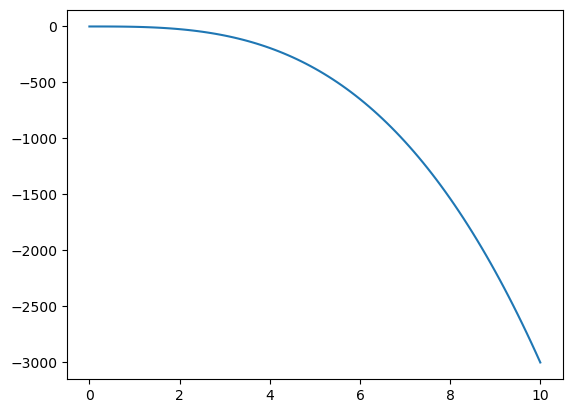

In [3]:
# Update this code to make the y array, and then a plt.plot graph of y vs x
import numpy as np
from matplotlib import pyplot as plt

x_curve = np.linspace(0, 10, 101)
y_curve = -3 * x_curve ** 3
plt.plot(x_curve,y_curve)
plt.show()

### Task 5.1.2 `plt.scatter()`

Ask Generative AI or do a web search for a summary of how to use `plt.scatter()`. Is there anything new to you or confusing that shows up in this summary? Add some notes below and try to resolve any confusing points.

* 

### Task 5.1.3 Adding a scatter plot, `plt.scatter()`

Now let's use `plt.scatter()` to add some data point markers whose size we can control across individual points. 

1. Copy your code from 5.1.1 into the cell below.
1. Also copy the following arrays and lists into the cell below
```python
x_points = x_curve[::20]
y_points = y_curve[::20]
size_points = [10, 20, 30, 40, 50, 60]
```
1. Using `x_points` and `y_points`, add a `plt.scatter()` plot on the same set of axes as the existing `plt.plot()`. Set their individual size via `size_points`. You should be able to reproduce the graph shown below.

![first_plot.png](attachment:first_plot.png)

**Optional bonus task:** Make a colours list and then make the data point markers all have different colours. 

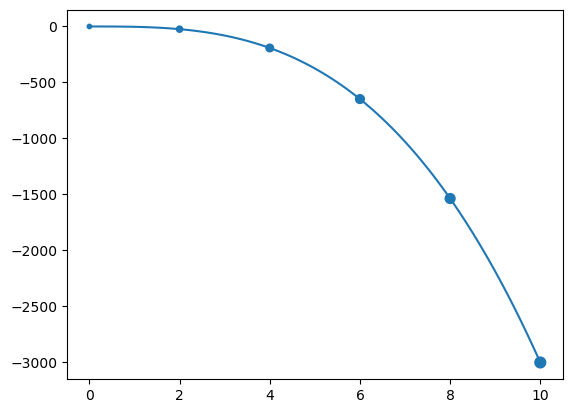

In [9]:
# Copy your code from above here and then update
x_points = x_curve[::20]
y_points = y_curve[::20]
size_points = [10, 20, 30, 40, 50, 60]
plt.plot(x_curve,y_curve)
plt.scatter(x_points,y_points,sizes=size_points)
plt.show()

## *Task 5.2 Plotting error bars*

Imaging that you have just completed an experiment, using a sonic range finder to collect the position and time data of a tennis ball thrown into the air, to test the research question:

> **Research Question:** Are the data collected in the lab consistent with the expected projectile motion relationship, $h = V_{0y} t + \frac{1}{2}at^2$?

The results are found in the three lists below, corresponding to time (`tdata`), position (`ydata`), and uncertainty in position (`dydata`), respectively.

Using $g = 9.81$ m/s$^2$ and
$V_{0y} = 10$ m/s, make a plot with
* The experimental data as points with error bars (`plt.errorbar()`), but with no connecting line. Documentation: [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)
* Additionally, a plot of the theoretical equation as a line. 
* Include appropriate axis labels and a legend.
* Instead of a title, write a caption for the graph in the Markdown cell immedatiately after the graph. Read https://www.internationalscienceediting.com/how-to-write-a-figure-caption/ and then make a suitable 'New Style' Caption that communicates to the reader what the take-home message of the graph should be. 

For help with `plt.errorbars()`, 

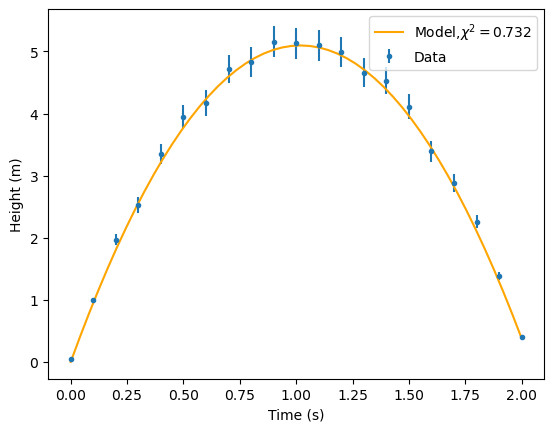

In [79]:
# Add your plotting code to this cell

# Data points
tdata = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 
     1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]) # s
ydata = np.array([0.05, 0.99, 1.97, 2.53, 3.35, 3.95, 4.17, 4.72, 4.83, 5.16, 
     5.13, 5.10, 4.99, 4.66, 4.53, 4.11, 3.39, 2.88, 2.26, 1.39, 0.40]) # m
dydata = np.array([0, 0.0475, 0.0902, 0.1279, 0.1608, 0.1887, 0.2117, 0.2298, 0.2430, 0.2513, 
           0.2547, 0.2532, 0.2468, 0.2355, 0.2193, 0.1981, 0.1721, 0.1412, 0.1053, 0.0646, 0.019]) # m

def model(t):
    v0y=10
    g=-9.81
    return v0y*t + 0.5*g*t**2

predx=np.linspace(0,tdata[-1])
prediction=(predx,model(predx))

def calculate_chi2(x,y,dy,model,n):
    residuals=y-model(x)
    dof=np.size(x)-n
    return np.sum((residuals/dy) ** 2) / dof

chi2=calculate_chi2(tdata[1:],ydata[1:],dydata[1:],model,2)
plt.plot()
plt.errorbar(tdata,ydata,yerr=dydata,linestyle='',marker='.',label='Data')
plt.plot(prediction[0],prediction[1],color='orange',label=f'Model,$\chi^2={chi2:.3f}$')
plt.ylabel('Height (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

**Fig 1.** Comparison between the empirical flight path of the tennis ball with a prediction model $h = V_{0y} t + \frac{1}{2}at^2$. Flight path data was obtained using a sonic range finder, and plotted alongside a model $h = V_{0y} t + \frac{1}{2}at^2$, yielding $\chi^2 = 0.732$, indicating that the model is a good fit.

## *Task 5.3 Curve fitting by hand with the damped harmonic oscillator*

For this task, you will again combine data points and a theoretical line on the same graph, but this time you will be doing this as a data-fitting task. Imagine you collected some data using a damped harmonic oscillator and expect data to follow the relationship

$$y(t) = e^{-t/\tau} \sin(\omega t + \phi).$$

Your data, with uncertainties in position, are shown below. 

1. Plot these data points, with error bars.
1. On the same plot, add the theortical line. You will need to make some reasonable initial guesses for parameters $\tau$, $\omega$ and $\phi$. Adjust the parameters by hand to try to make the theoretical curve look as good of a fit as possible. This fit should look good to the eye, but you do not need to use any goodness of fit measures to make a precise fit beyond that.
1. Add axis labels, a legend and a caption.

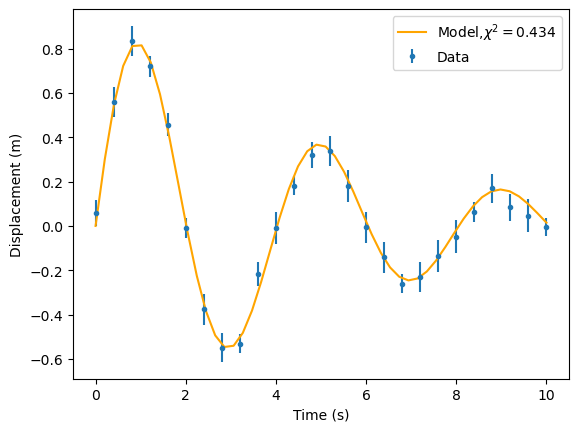

In [80]:
# Add your plotting code to this cell

# Data points
tdata = [0.0, 0.4, 0.8, 1.2, 1.6, 
         2.0, 2.4, 2.8, 3.2, 3.6, 
         4.0, 4.4, 4.8, 5.2, 5.6, 
         6.0, 6.4, 6.8, 7.2, 7.6, 
         8.0, 8.4, 8.8, 9.2, 9.6, 10.0] # s
ydata = [0.058, 0.559, 0.836, 0.72, 0.457, 
         -0.009, -0.377, -0.549, -0.532, -0.219, 
         -0.009, 0.182, 0.319, 0.339, 0.181, 
         -0.007, -0.141, -0.26, -0.231, -0.136, 
         -0.048, 0.062, 0.169, 0.084, 0.046, -0.006] # m
dydata = [0.059, 0.069, 0.067, 0.046, 0.053, 
          0.044, 0.07, 0.065, 0.043, 0.054, 
          0.072, 0.043, 0.059, 0.067, 0.071, 
          0.068, 0.07, 0.045, 0.066, 0.073, 
          0.076, 0.044, 0.064, 0.06, 0.074, 0.041] # m

tdata=np.array(tdata)
ydata=np.array(ydata)
dydata=np.array(dydata)

tau=5
omega=1.56
phi=0

model = lambda t: np.exp(-t/tau) * np.sin(omega * t + phi)
chi2=calculate_chi2(tdata,ydata,dydata,model,3)

predx=np.linspace(0,tdata[-1])
prediction=(predx,model(predx))

plt.plot()
plt.errorbar(tdata,ydata,yerr=dydata,linestyle='',marker='.',label='Data')
plt.plot(prediction[0],prediction[1],color='orange',label=f'Model,$\chi^2={chi2:.3f}$')
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

**Fig 2.** Empirical data of a damped harmonic oscillator compared against a model. The displacement level of a damped oscillator was measured over 10 seconds from a neutral/unstretched beginning and registering a maximum displacement of roughly 0.8 meters. Manual fitting with a model $y(t) = e^{-t/\tau} \sin(\omega t + \phi)$ produced time constant $\tau \approx 5$ s, $\omega \approx 1.56$ rad, and $\phi \approx 0$ for $\chi^2 = 0.434$, indicating a good fit.

## *Task 5.4 Multi-panel plot of the motion of a ball thrown into the air*

Use `plt.suplot()` or `plt.subplots()` to make a multi-panel plot of the motion of a ball thrown up into the air from an initial height of `y0 = 0 m` and with an initial upward velocity of `v0 = 20 m/s`. Use `np.linspace()` or `np.arrange()` to create an array of times in the range of `t = 0 - 4 s`, with approximately 100 individual times so that the curves will appear smooth. Then create arrays for `y(t)` and `v(t)` based on your array of times.

Try to reproduce the following plot as closely as you can. Some quick hints:

* You can modify the size of the overall plotting canvas:
    - When using `plt.subplots()`, use `fig, ax = plt.subplots(2,1, figsize=(6, 6))`. 
    - When using `plt.subplot()`, use `plt.figure(figsize=(6, 6))` before your first call to `plt.subplot()`.
* You can insert a line break in a string used for labels and titles using the `\n` new line escape character. For example, you can get the output<br><br>&nbsp;&nbsp;&nbsp;Hello<br>&nbsp;&nbsp;&nbsp;world<br><br>as follows:
```python
my_string = "Hello\nworld"
print(my_string)
```


![Worksheet05-fig.png](attachment:Worksheet05-fig.png)

In [92]:
# Your answer using either plt.subplot() or plt.subplots()

y0=0
v0=20

time_data=np.linspace(0,4,100)
y_data=[y0] + [0]*(np.size(time_data)-1) 
v_data=[v0] + [0]*(np.size(time_data)-1)

dt=time_data[1]-time_data[0]
g=-9.8 #m/s^2

for i in range(1,np.size(time_data)):
    y_data[i] = y_data[i-1] + v_data[i-1] * dt
    v_data[i] = v_data[i-1] + g * dt

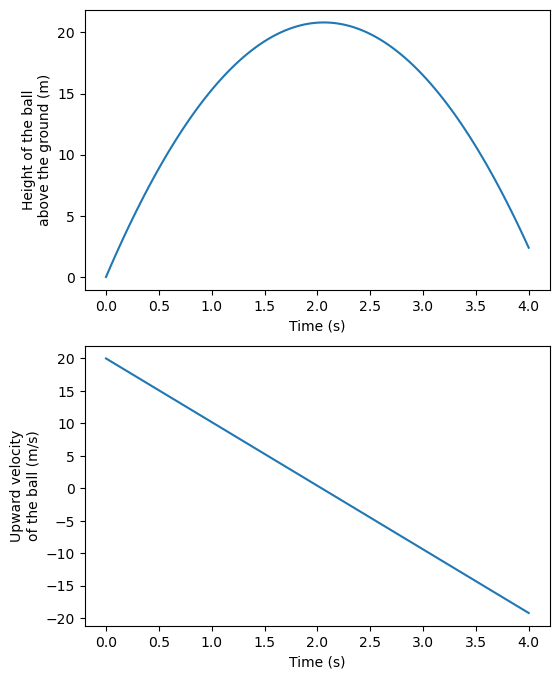

In [93]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height of the ball\nabove the ground (m)')
ax1.plot(time_data,y_data);
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Upward velocity\nof the ball (m/s)')
ax2.plot(time_data,v_data)
plt.show()

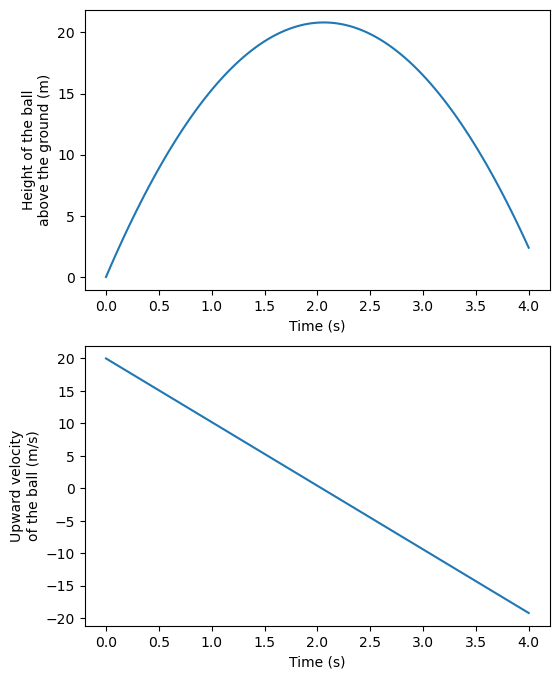

In [94]:
# (Optional) Your answer using the method not used above

plt.figure(figsize=(6,8))
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height of the ball\nabove the ground (m)')
ax1.plot(time_data,y_data);
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Upward velocity\nof the ball (m/s)')
ax2.plot(time_data,v_data)
plt.show()

## Group check-out for engagement points
Once you reach this point call one of the members of the teaching team over to ask each of you a check-out question. 